<a href="https://colab.research.google.com/github/Brandon-Bernal-Alarcon/Notas/blob/main/Machine%20Learning/Aprendizaje%20Supervisado/11_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

Un árbol de decisión es un modelo de aprendizaje supervisado que divide el espacio de características en regiones, utiliza reglas del tipo if–else, toma decisiones secuenciales desde la raíz hasta una hoja

Cada nodo interno representa:

- Una característica

- Un umbral de decisión

Cada hoja representa:

- Una clase predicha (clasificación)

- O un valor (regresión)

**Criterio de partición (impureza)**

En clasificación, los árboles buscan divisiones que reduzcan la impureza del nodo. Las medidas más comunes son:

**Entropía**

$$H = - ∑_k p_k log_2(p_k)$$

**Índice Gini (default en scikit-learn)**  

$$ G = 1 - ∑_kp^2_k $$

El árbol elige la división que maximiza la reducción de impureza (information gain).

**Entrenamiento de un árbol de decisión (dataset Iris)**

In [1]:
def plot_decision_tree(clf, feature_names, class_names):
    # This function requires the pydotplus module and assumes it's been installed.
    # In some cases (typically under Windows) even after running conda install, there is a problem where the
    # pydotplus module is not found when running from within the notebook environment.  The following code
    # may help to guarantee the module is installed in the current notebook environment directory.
    #
    # import sys; sys.executable
    # !{sys.executable} -m pip install pydotplus

    export_graphviz(clf, out_file="adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    with open("adspy_temp.dot") as f:
        dot_graph = f.read()
    # Alternate method using pydotplus, if installed.
    # graph = pydotplus.graphviz.graph_from_dot_data(dot_graph)
    # return graph.create_png()
    return graphviz.Source(dot_graph)


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


El árbol sin restricciones tiende a ajustarse muy bien a los datos de entrenamiento, esto suele llevar a sobreajuste, alta precisión en training no garantiza buen desempeño en test

**Sobreajuste en árboles de decisión**

Los árboles de decisión:

- Son modelos de alta varianza

- Pueden crecer hasta memorizar los datos

Señales típicas:

- Accuracy entrenamiento ≈ 1.00

- Accuracy test significativamente menor

**Pre-poda: controlando la profundidad del árbol**

Una forma de reducir el sobreajuste es limitar la profundidad máxima.

In [3]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


- max_depth limita el número de niveles

- Reduce la complejidad del modelo

- Mejora la generalización

- Ejemplo típico de bias–variance tradeoff

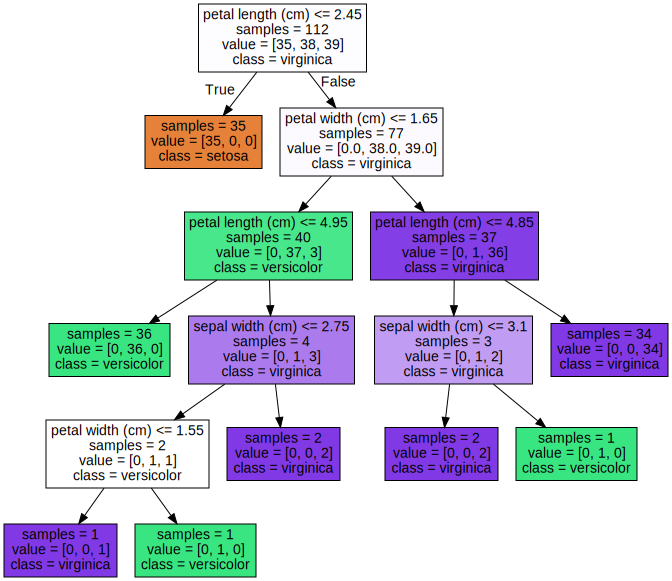

In [4]:
from sklearn.tree import export_graphviz
import graphviz

plot_decision_tree(clf, iris.feature_names, iris.target_names)

Árbol pre-podado (max_depth = 3)

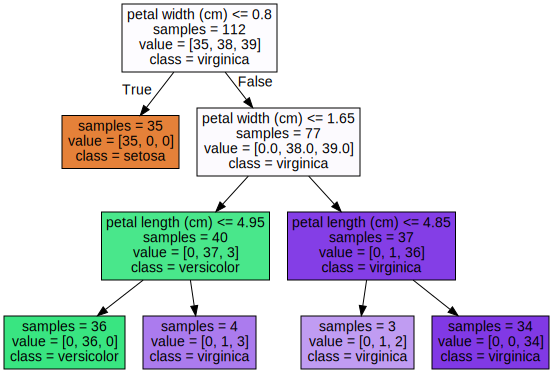

In [6]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

**Interpretación**

- Árbol completo: muchas ramas, difícil de interpretar

- Árbol pre-podado: reglas claras y compactas

- La poda mejora interpretabilidad

**Importancia de características (feature importance)**

Los árboles permiten medir qué tan importantes son las variables.

In [12]:
import matplotlib.pyplot as plt
import numpy

def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(numpy.arange(c_features), feature_names)

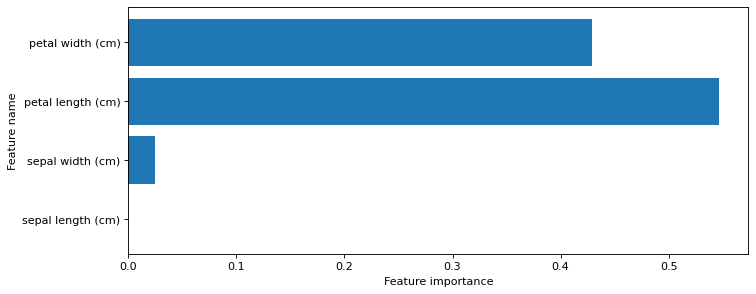

Feature importances: [0.         0.02457904 0.54643762 0.42898334]


In [13]:
plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

**Interpretación**

- La importancia indica cuánto contribuye una variable a reducir impureza

- Las importancias suman 1

- Permite identificar variables clave del modelo

**Fronteras de decisión con pares de características**

Para visualizar cómo el árbol separa clases en 2D:

In [14]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)



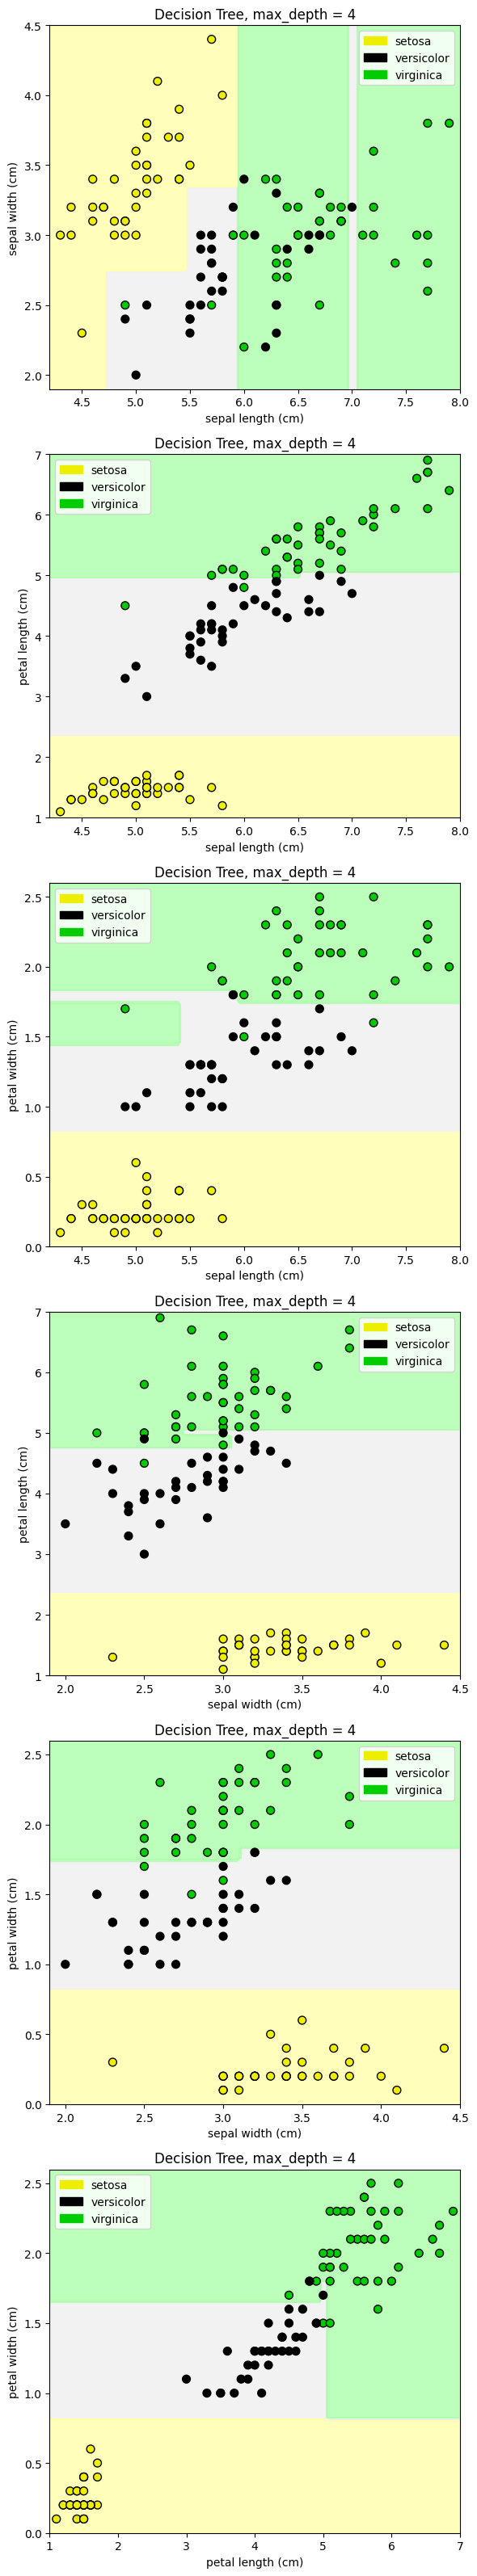

In [18]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
import matplotlib.patches as mpatches

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train

    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)

    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])

plt.tight_layout()
plt.show()

**Interpretación**

- Las fronteras son rectangulares

- Los árboles no generan fronteras suaves

- Cada división es paralela a un eje

**Árboles de decisión en un dataset real (cáncer de mama)**

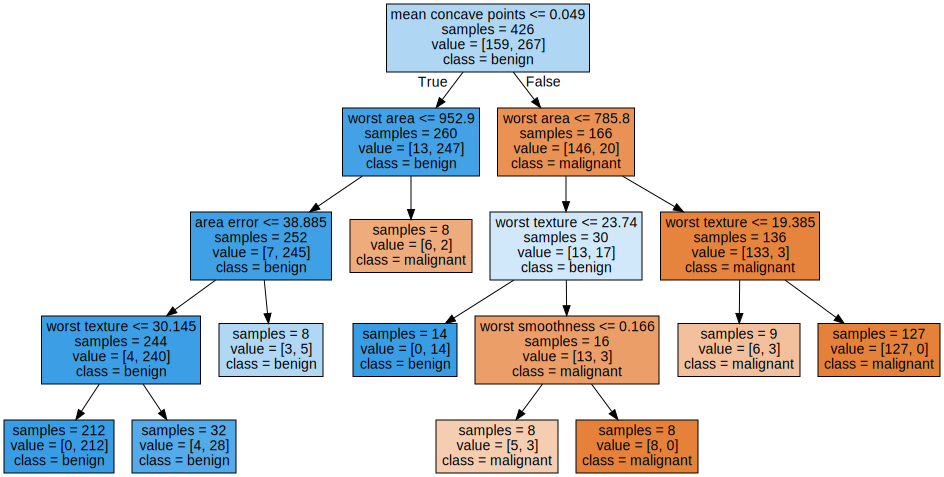

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94


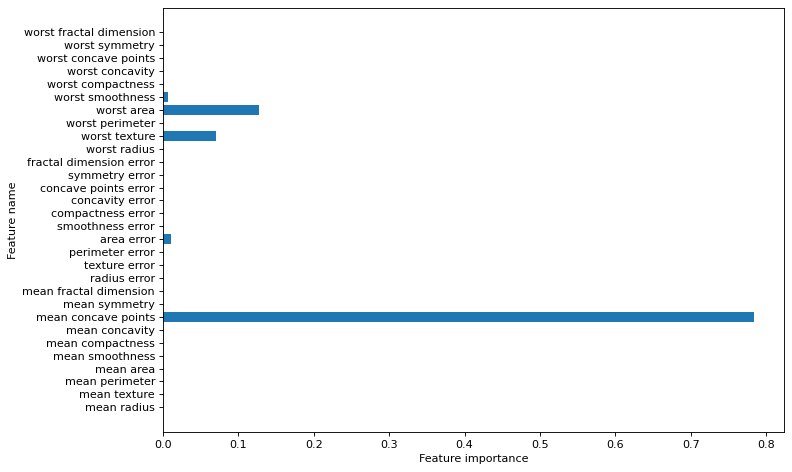

In [22]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()

**Interpretación**

- min_samples_leaf evita hojas con muy pocos datos

- Mejora la estabilidad del modelo

- Buen balance entre precisión e interpretabilidad

**Interpretación**

- El árbol muestra reglas claras y jerárquicas

- Las importancias destacan variables médicas clave

- Útil para modelos explicables